In [1]:
import signac
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, sem
from tqdm import tqdm
import scienceplots
plt.style.use(['science','no-latex'])


project = signac.get_project('/data/yang_lab/nehilpkd/fiberForge/simulations/smd/fibril')

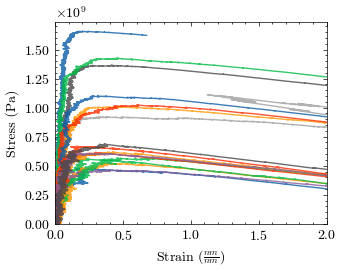

(10000000.0, 100000000000.0)

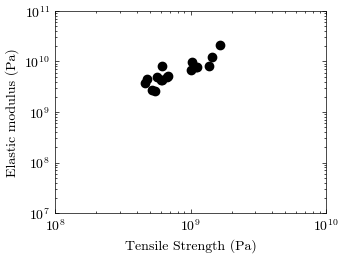

In [2]:
for job in project:
    if 'stress' in job.doc:
        try:
            # if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
            # if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0):
                # continue
            stress = np.array(job.doc.get('stress'))
            plt.plot(np.array(job.doc['strain']), np.array(stress), label=job.sp.pdbID, alpha=.8)
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Strain $(\\frac{nm}{nm})$')
plt.ylabel('Stress (Pa)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0)
plt.xlim(0,2)
plt.savefig('stress_strain.png', dpi=600)
plt.show()
plt.close()

# Ashby plot
for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
                continue
            plt.scatter(np.array(job.doc['ultimate_tensile_strength']), np.array(job.doc['elastic_modulus']), label=job.sp.pdbID, edgecolors='k', color = 'black')
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Tensile Strength (Pa)')
plt.ylabel('Elastic modulus (Pa)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e8, 1e10)
plt.ylim(1e7, 1e11)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

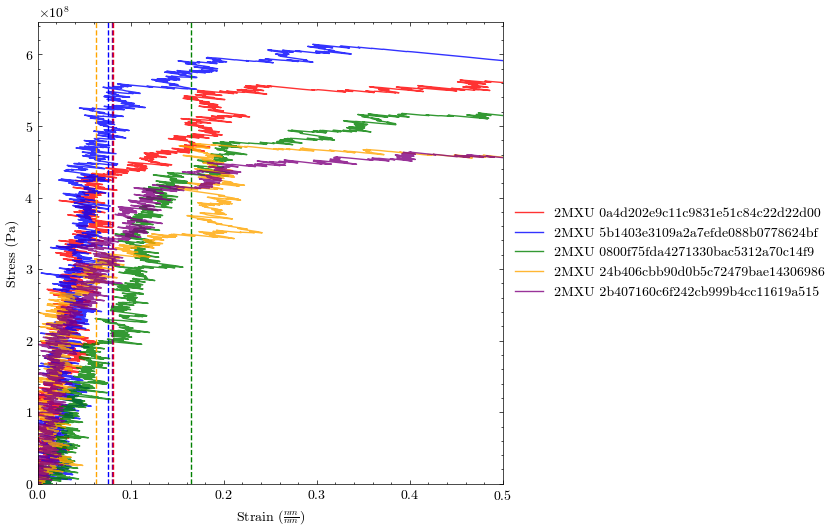

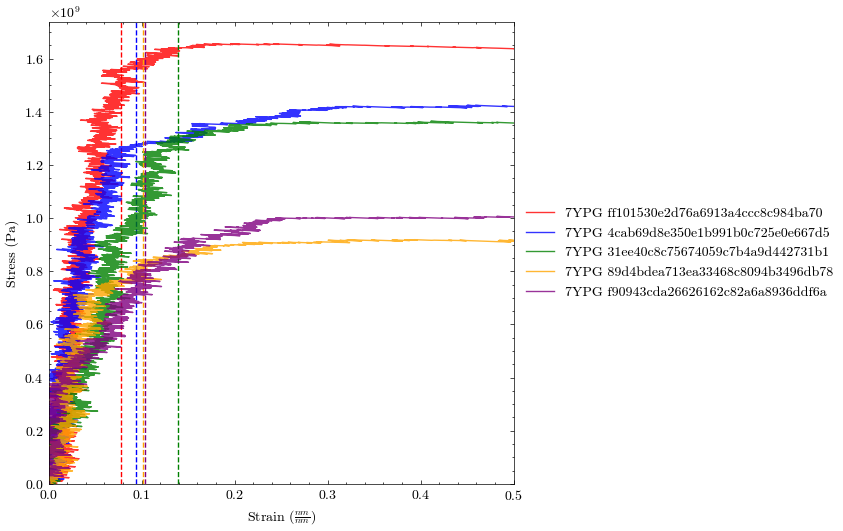

No yield point in 3a80a53daab156fb9e6672c2160c1733
No yield point in 67e550ef8c50c81a2b62014d3c87a544
No yield point in 508bddaf1734379cbb4df8638360e581


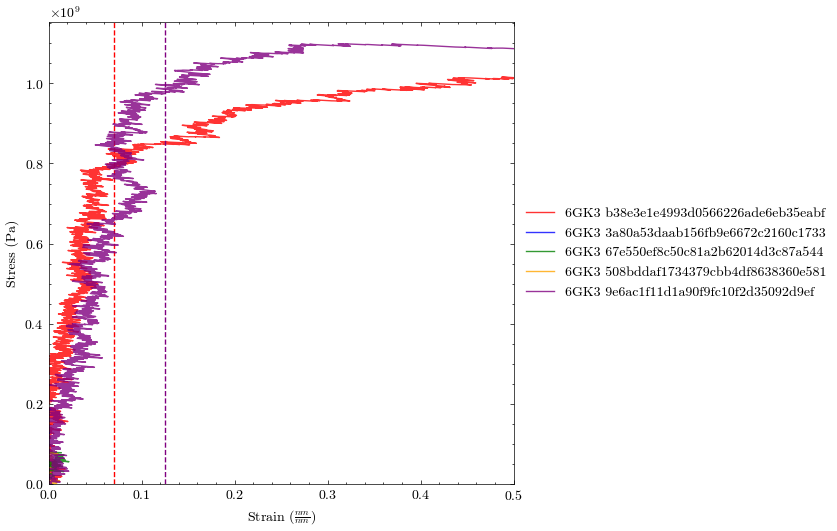

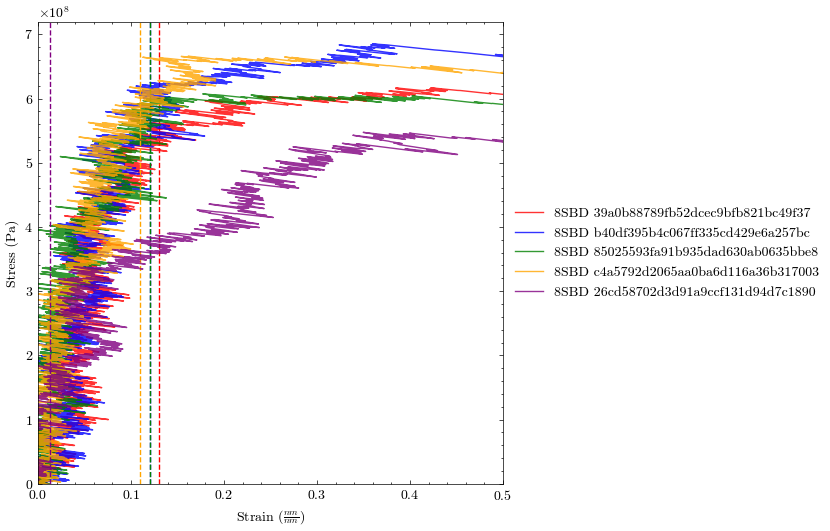

/tmp/ipykernel_20867/2574408926.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


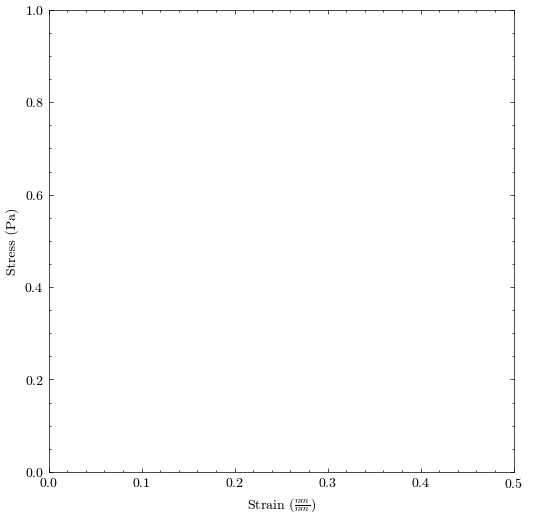

In [3]:
pdbs = ['2MXU', '7YPG', '6GK3', '8SBD', '2N0A']
# pdbs = pdbs[0]

sub = project.find_jobs({"sp.pdbID": {"$in": pdbs}, "sp.pull_chains":{'$in': [[0,1]]}})

colors = ['red', 'blue', 'green', 'orange', 'purple'] # assuming a max of 5 replicates

for pdb in pdbs:
    plt.figure(figsize=(6,6))
    for i, job in enumerate(project.find_jobs({"sp.pdbID": pdb})):
        if 'stress' in job.doc:
            try:
                if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
                    continue
                stress = np.array(job.doc.get('stress'))
                plt.plot(np.array(job.doc['strain']), np.array(stress), color = colors[i], label=job.sp.pdbID +" " + job.id, alpha=.8)
                if 'yield_point' in job.doc:
                    plt.axvline(job.doc['yield_point'], color = colors[i], linestyle='--')
                    # print(job.id)
                else:
                    print(f'No yield point in {job.id}')
                # plt.axvline(job.doc['yield_point'], color='black', linestyle='--')
            except:
                print(f'Error in {job.sp.pdbID}')
    plt.xlabel('Strain $(\\frac{nm}{nm})$')
    plt.ylabel('Stress (Pa)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0)
    plt.xlim(0,.5)
    plt.show()

In [5]:
# project.find_jobs({'sp.pdbID': '2MXU'})
subdf = project.find_jobs({"sp.pdbID": {"$in": ['2MXU', '7YPG', '6GK3', '8SBD', '2N0A']}}).to_dataframe()
subdf[['sp.pdbID', 'doc.cross_sectional_area',	'doc.strain',	'doc.stress',	'doc.ultimate_tensile_strength',	'doc.elastic_modulus']]

,sp.pdbID,doc.cross_sectional_area,doc.strain,doc.stress,doc.ultimate_tensile_strength,doc.elastic_modulus
0800f75fda4271330bac5312a70c14f9,2MXU,3.209906e-18,"[0.0, 0.009545749133351794, 0.0014738572054456...","[3.6409168753755576, -1161507.6250508218, 3956...",5.182177e+08,2.721989e+09
26cd58702d3d91a9ccf131d94d7c1890,8SBD,2.847113e-18,"[0.0, -0.008844525870238198, -0.00788606806674...","[10.10852167687762, 2072130.8612440696, 223675...",5.472948e+08,2.622465e+09
c4a5792d2065aa0ba6d116a36b317003,8SBD,2.847113e-18,"[0.0, -0.006455483199142858, 0.004712389547474...","[-5.8260076098023355, 1552924.149536064, -1749...",6.657376e+08,4.875141e+09
89d4bdea713ea33468c8094b3496db78,7YPG,2.887518e-18,"[0.0, -0.0043420029821787855, -0.0077466911968...","[3.853966680220486, 1079556.7282134453, 200073...",1.110881e+09,7.811936e+09
9e6ac1f11d1a90f9fc10f2d35092d9ef,6GK3,3.009287e-18,"[0.0, 0.00299056518869625, 0.00326993460130791...","[0.1793597466031365, -197804.64575913368, 8506...",1.098918e+09,3.529838e+09
85025593fa91b935dad630ab0635bbe8,8SBD,2.847113e-18,"[0.0, 0.009022921795989125, 0.0207408716467786...","[1.3248158593269206, -1226846.4307519163, -292...",6.071906e+08,4.353657e+09
67e550ef8c50c81a2b62014d3c87a544,6GK3,3.009287e-18,"[0.0, -0.0024466363929157523, -0.0011715225838...","[5.527754107670353, 764247.4124406109, 871342....",7.873991e+07,3.985283e+10
24b406cbb90d0b5c72479bae14306986,2MXU,3.209906e-18,"[0.0, 0.004504334715416516, -0.001929890689784...","[5.587298013587577, -432925.48437286244, 94195...",4.752164e+08,4.410638e+09
ff101530e2d76a6913a4ccc8c984ba70,7YPG,2.887518e-18,"[0.0, 0.00087363348630775, 0.00452971522949351...","[-1.1023617770877236, 203785.36263154284, -455...",1.656031e+09,2.142279e+10
4cab69d8e350e1b991b0c725e0e667d5,7YPG,2.887518e-18,"[0.0, -0.0039397959077093385, -0.0070398261977...","[-0.9575453877594288, 999487.9765090696, 18595...",1.424271e+09,1.233209e+10


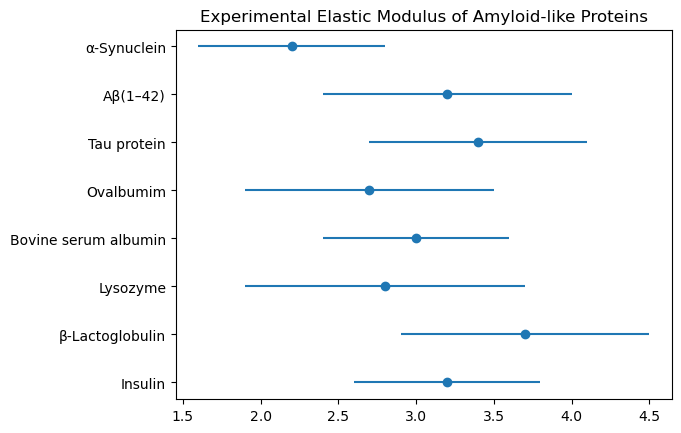

In [6]:
# experimental reports on similar β-sheet structures find the elastic modulus in the range of 10–30 GPa and the strength on the order of 100 MPa
simulated_results = [ # Tensile deformation and failure of amyloid and amyloid-like protein fibrils
    ['stacked aBeta (1-40)', 7.85, 5.46, 13.0, 242.6], # inital length (nm), cross-sectional area (nm2) Young’s modulus  (GPa) Ultimate tensile strength (MPa)
    ['Iowa mutant aBeta', 6.96, 3.64, 11.7, 402.3],
    ['Helical YadA CBP', 3.52, 1.40, 12.6, 553.7],
    ['LpIBP', 3.74, 1.89, 26.9, 693.4],
    ['GlmU C-terminus', 5.37, 2.20, 23.3, 629.8],
    ['Mixed HET-s prion', 5.38, 2.10, 9.8, 917.0],
]
experimental_results = [ # elastic modulus (GPa), certainty https://doi-org.proxy.library.vanderbilt.edu/10.1039/C2NR30768E
    ['Insulin', 3.2, 0.6], #8SBD  3dbf2ff171970a0eb7fc96b2b2025de7
    ['β-Lactoglobulin', 3.7, 0.8], #6GK3
    ['Lysozyme', 2.8, 0.9],
    ['Bovine serum albumin', 3.0, 0.6],
    ['Ovalbumim', 2.7, 0.8],
    ['Tau protein', 3.4, 0.7], #7YPG for (297-391) 7NRS
    ['Aβ(1–42)', 3.2, 0.8], # 2MXU
    ['α-Synuclein', 2.2, 0.6], #2N0A 7WO0
]
# plot with error bars and x axis text vertical
plt.title('Experimental Elastic Modulus of Amyloid-like Proteins')
plt.errorbar([e[1] for e in experimental_results], [e[0] for e in experimental_results], xerr=[e[2] for e in experimental_results], fmt='o')
# plt.plot([e[0] for e in experimental_results], [e[1] for e in experimental_results])

experimental_results = [  # elastic modulus (GPa), certainty
    ['α-Synuclein', 1.4, .4] #  https://doi.org/10.1002/polb.23428

]
experiment_results = [ # Tensile strength (GPa), uncertainty https://doi.org/10.1016/j.polymer.2013.02.029
    ['hiPP', 0.6, .4] # two prototfibrils
]
experimental = [ #fracture force (pN), uncertainty https://doi.org/10.1016/j.polymer.2013.02.029
    ['Aβ(1–42)', 23],
    ['Aβ(1–40)', 33],
]

Font 'default' does not have a glyph for '\u2013' [U+2013], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2013' [U+2013], substituting with a dummy symbol.


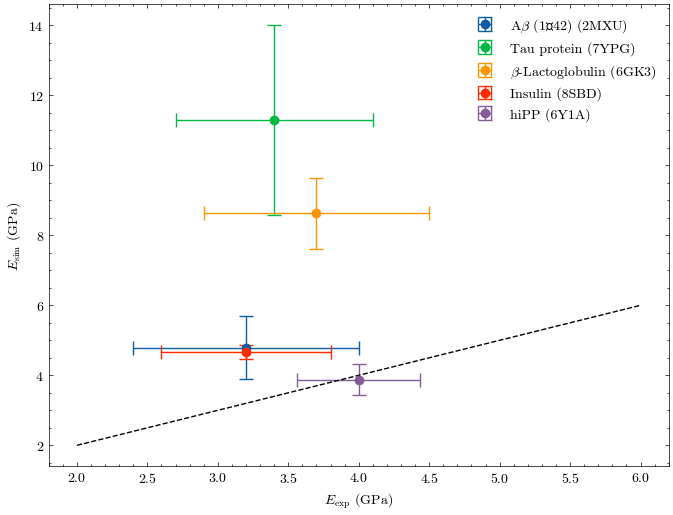

In [4]:
def get_value_mean_sem(project_df, pdb, key):
    jobs = project_df[project_df['sp.pdbID'] == pdb]
    mean = np.mean(jobs[f'doc.{key}'])
    std_err = sem(jobs[f'doc.{key}'])
    if len(jobs) == 0:
        raise ValueError(f'No jobs found for {pdb}')
    if len(jobs) == 1:
        return mean, 0
    return mean, std_err

# pdbs = ['2MXU', '7YPG', '6GK3', '8SBD', '2N0A']
pdbs = ['2MXU', '7YPG', '6GK3', '8SBD', '6Y1A']
# pdbs = ['2MXU', '7YPG', '6GK3', '8SBD', '2N0A', '6Y1A']
# pdbs = ['2MXU', '8SBD', '2N0A', '6Y1A']
pdbs_to_name = {
    '2MXU': 'A$\\beta$ (1–42)',
    '7YPG': 'Tau protein',
    '6GK3': '$\\beta$-Lactoglobulin',
    '8SBD': 'Insulin',
    '2N0A': '$\\alpha$-Synuclein',
    '6Y1A': 'hiPP'
}
pdb_to_exp = {
    '2MXU': 3.2,
    '7YPG': 3.4,
    '6GK3': 3.7,
    '8SBD': 3.2,
    '2N0A': 2.2,
    '6Y1A': 4.0
}
pdb_to_exp_err = {
    '2MXU': 0.8,
    '7YPG': 0.7,
    '6GK3': 0.8,
    '8SBD': 0.6,
    '2N0A': 0.6,
    '6Y1A': sem(np.array([2.89e9, 5.40e9, 3.44e9, 4.22e9, 3.43e9])/1e9)
}

subdf = project.find_jobs({"sp.pdbID": {"$in": ['2MXU', '6GK3', '2N0A', '7YPG', '6Y1A']}}).to_dataframe()
subdf2 = project.find_jobs({"sp.pdbID": {"$in": '8SBD'}, "sp.pull_chains":{'$in': [[0,1]]}}).to_dataframe()

sim_val, sim_err = {}, {}
for pdb in pdbs:
    if pdb == '8SBD':
        exclude_df = subdf2.index.isin(['26cd58702d3d91a9ccf131d94d7c1890'])
        mean, error = get_value_mean_sem(subdf2[~exclude_df], '8SBD', 'elastic_modulus')
        sim_val[pdb] = mean/1e9
        sim_err[pdb] = error/1e9
    elif pdb == '6GK3':
        include_df = subdf.index.isin(['9e6ac1f11d1a90f9fc10f2d35092d9ef', 'b38e3e1e4993d0566226ade6eb35eabf'])
        mean, error = get_value_mean_sem(subdf[include_df], '6GK3', 'elastic_modulus')
        sim_val[pdb] = mean / 1e9
        sim_err[pdb] = error / 1e9
    elif pdb == '6Y1A':
        sim_val[pdb] = np.mean(np.array([2.89e9, 5.40e9, 3.44e9, 4.22e9, 3.43e9])/1e9)
        sim_err[pdb] = sem(np.array([2.89e9, 5.40e9, 3.44e9, 4.22e9, 3.43e9])/1e9)
    elif pdb == '7YPG':
        # exclude_df = subdf.index.isin(['f90943cda26626162c82a6a8936ddf6a', 'ff101530e2d76a6913a4ccc8c984ba70', '89d4bdea713ea33468c8094b3496db78'])
        # print(subdf[~exclude_df])
        # mean, error = get_value_mean_sem(subdf[~exclude_df], '7YPG', 'elastic_modulus')
        mean, error = get_value_mean_sem(subdf, '7YPG', 'elastic_modulus')
        sim_val[pdb] = mean / 1e9
        sim_err[pdb] = error / 1e9
    else:
        mean, error = get_value_mean_sem(subdf, pdb, 'elastic_modulus')
        sim_val[pdb] = mean/1e9
        sim_err[pdb] = error/1e9


plt.figure(figsize=(8, 6))

for pdb in pdbs:
    real = pdb_to_exp[pdb]
    exp_err = pdb_to_exp_err[pdb]
    pred = sim_val[pdb]
    pred_err = sim_err[pdb]

    plt.errorbar(
        real, 
        pred, 
        yerr=pred_err, 
        xerr = exp_err, 
        fmt='o', 
        capsize=5, 
        label = pdbs_to_name[pdb] + f' ({pdb})'
    )



plt.plot([2, 6], [2, 6], 'k--')
plt.xlabel('$E_\\text{exp}$ (GPa)')
plt.ylabel('$E_\\text{sim}$ (GPa)')
plt.legend()
plt.show()

In [2]:
subdf = project.find_jobs({
    "sp.pdbID": {"$in": ['6GK3', '2N0A', '8SBD', '2MXU', '7YPG']},
    # "sp.pdbID": {"$in": ['8SBD']},
    "sp.pull_chains":{'$in': [[0,-1]]}
    # "sp.replicate": 1
}).to_dataframe()
# subdf['doc.elastic_modulus'].mean() / 1e9
# subdf[['sp.replicate','sp.pull_chains','sp.pdbID','doc.elastic_modulus']]
subdf

NameError: name 'project' is not defined